In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import MDS
%matplotlib inline

In [338]:
def ThreeComponentPlot(feature, target, method, plot_dim="2D"):
    # scaling data to mu=0 and std=1 with normal assumption

    scaler = StandardScaler(with_mean=True, with_std=True)
    scaled_data = scaler.fit_transform(feature)
    
    if method == "PCA":
        pca = PCA(n_components=3)
        x_pca = pca.fit_transform(scaled_data)
        xx = x_pca
        label = "principal component"
        print("Explained variance ratio: ", pca.explained_variance_ratio_)  
    if method == "MDS":
        model = MDS(n_components=3)
        x_mds = model.fit_transform(feature)
        xx = x_mds
        label = "MDS dimension"
    
    fig = plt.figure(figsize=(8,6))
        
    if plot_dim == "3D":
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(xx[:,0],xx[:,1],xx[:,2], c=target, cmap="plasma", s=60)
        ax.set_xlabel('First '+label)
        ax.set_ylabel('Second '+label)
        ax.set_ylabel('Third '+label)
    if plot_dim == "2D":
        fig, axes = plt.subplots(nrows = 3, ncols = 1, sharex=True, sharey = True)

        axes[0].scatter(xx[:,0],xx[:,1],c=target,cmap='plasma')
        axes[0].set_xlabel('First '+label)
        axes[0].set_ylabel('Second '+label)

        axes[1].scatter(xx[:,0],xx[:,2],c=target,cmap='plasma')
        axes[1].set_xlabel('First '+label)
        axes[1].set_ylabel('Third '+label)

        axes[2].scatter(xx[:,1],xx[:,2],c=target,cmap='plasma')
        axes[2].set_xlabel('Second '+label)
        axes[2].set_ylabel('Third '+label)

        plt.subplots_adjust(hspace=0.2, top=4, bottom=0, left=0, right=1.5)
    
    return plt.show()

# Read dataframe adding labels.

In [339]:
header = np.append(["Bag Class", "Bag ID"],['f'+str(i) for i in range(1, 167)])
df = pd.read_csv("Musk1.csv", header=None, names=header)

In [340]:
df.head()

,Bag Class,Bag ID,f1,f2,f3,f4,f5,f6,f7,f8,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,1,1,42,-198,-109,-75,-117,11,23,-88,...,-238,-74,-129,-120,-38,30,48,-37,6,30
1,1,1,42,-191,-142,-65,-117,55,49,-170,...,-238,-302,60,-120,-39,31,48,-37,5,30
2,1,1,42,-191,-142,-75,-117,11,49,-161,...,-238,-73,-127,-120,-38,30,48,-37,5,31
3,1,1,42,-198,-110,-65,-117,55,23,-95,...,-238,-302,60,-120,-39,30,48,-37,6,30
4,1,2,42,-198,-102,-75,-117,10,24,-87,...,-238,-73,-127,51,128,144,43,-30,14,26


# split features and classes

In [341]:
target = df.iloc[:, 0:2]
features = df.iloc[:, 2:]

Explained variance ratio:  [0.31188125 0.13921923 0.07618026]


C:\Users\burak.onar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\burak.onar\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


<Figure size 576x432 with 0 Axes>

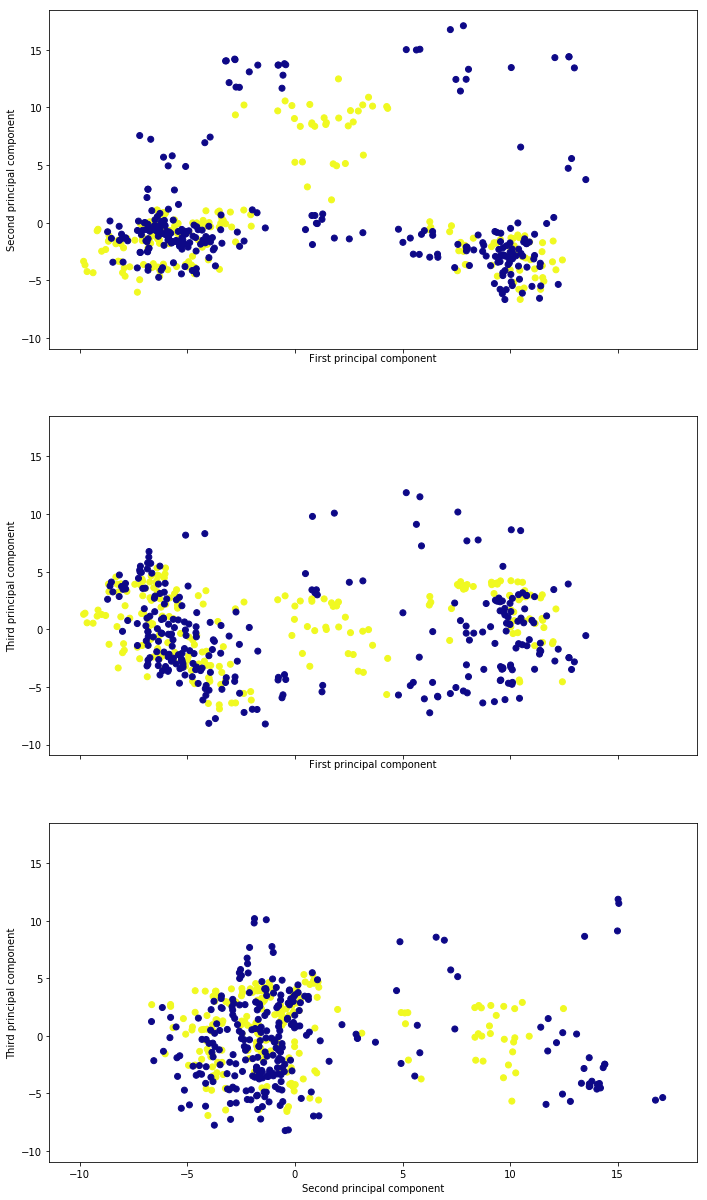

In [342]:
ThreeComponentPlot(features,target["Bag Class"],"PCA")

C:\Users\burak.onar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\burak.onar\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


<Figure size 576x432 with 0 Axes>

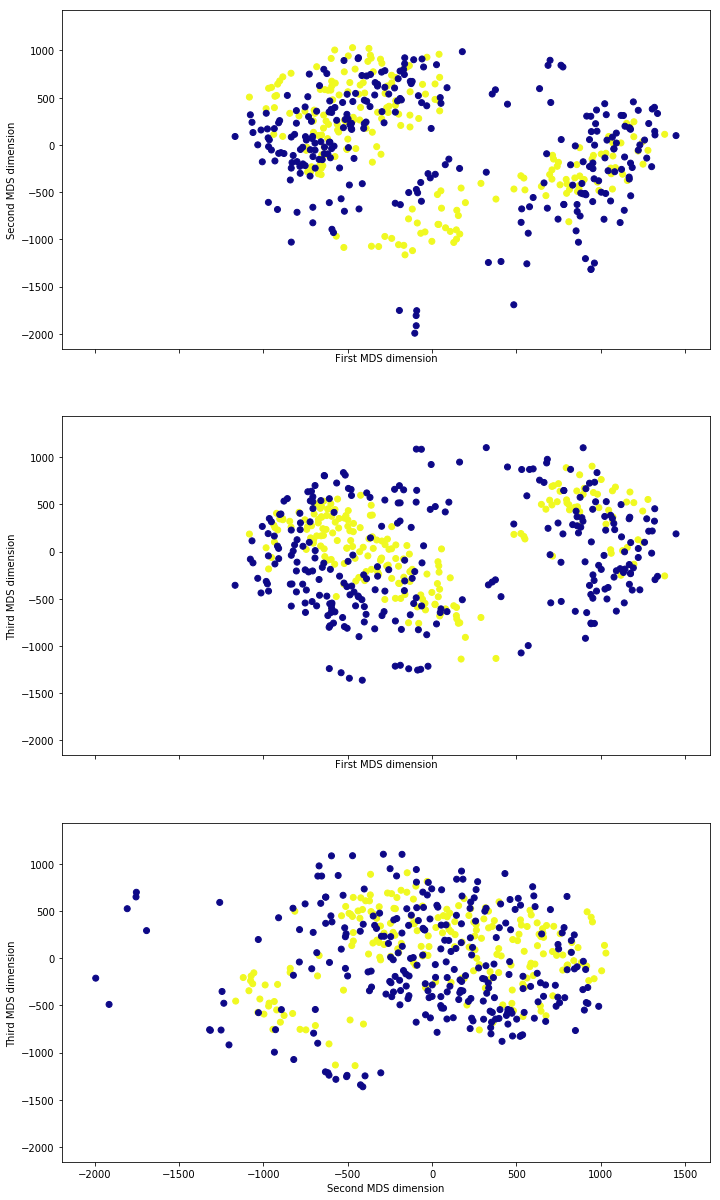

In [343]:
ThreeComponentPlot(features,target["Bag Class"],"MDS")

## plots of 3 components with eachother

C:\Users\burak.onar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\burak.onar\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Explained variance ratio:  [0.31188125 0.13921923 0.07618026]


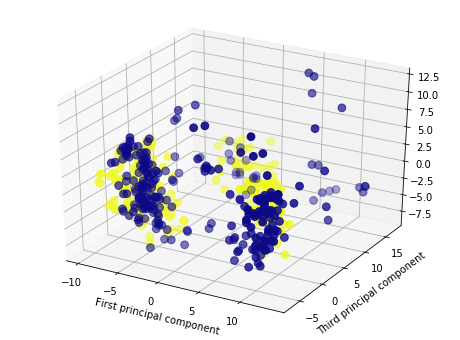

In [345]:
ThreeComponentPlot(features,target["Bag Class"],"PCA","3D")

C:\Users\burak.onar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\burak.onar\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


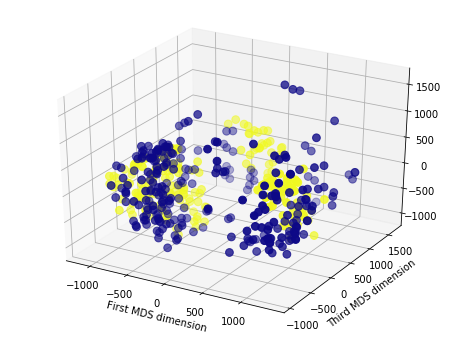

In [346]:
ThreeComponentPlot(features,target["Bag Class"],"MDS","3D")

In [347]:
bag_mean = df.groupby(["Bag ID"]).mean()
bag_feat = bag_mean.iloc[:, 1:]
bag_targ = bag_mean.iloc[:, 0]

Explained variance ratio:  [0.26662286 0.19065605 0.13255029]


<Figure size 576x432 with 0 Axes>

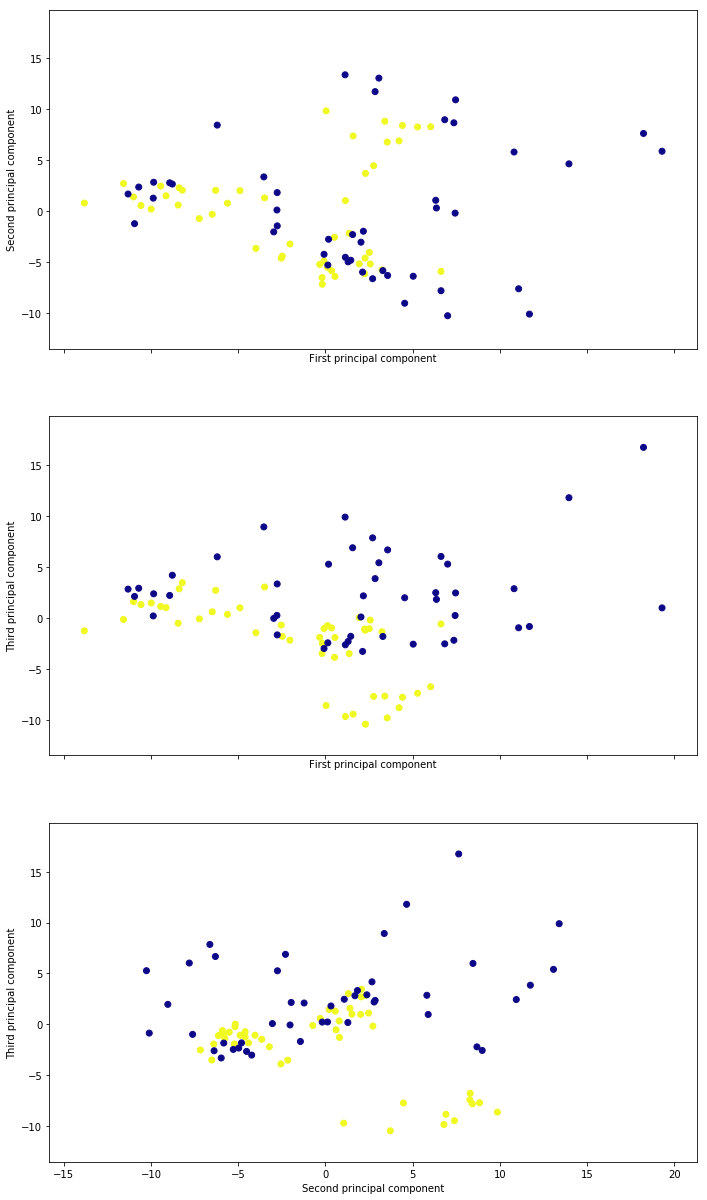

In [348]:
ThreeComponentPlot(bag_feat,bag_targ,"PCA")

<Figure size 576x432 with 0 Axes>

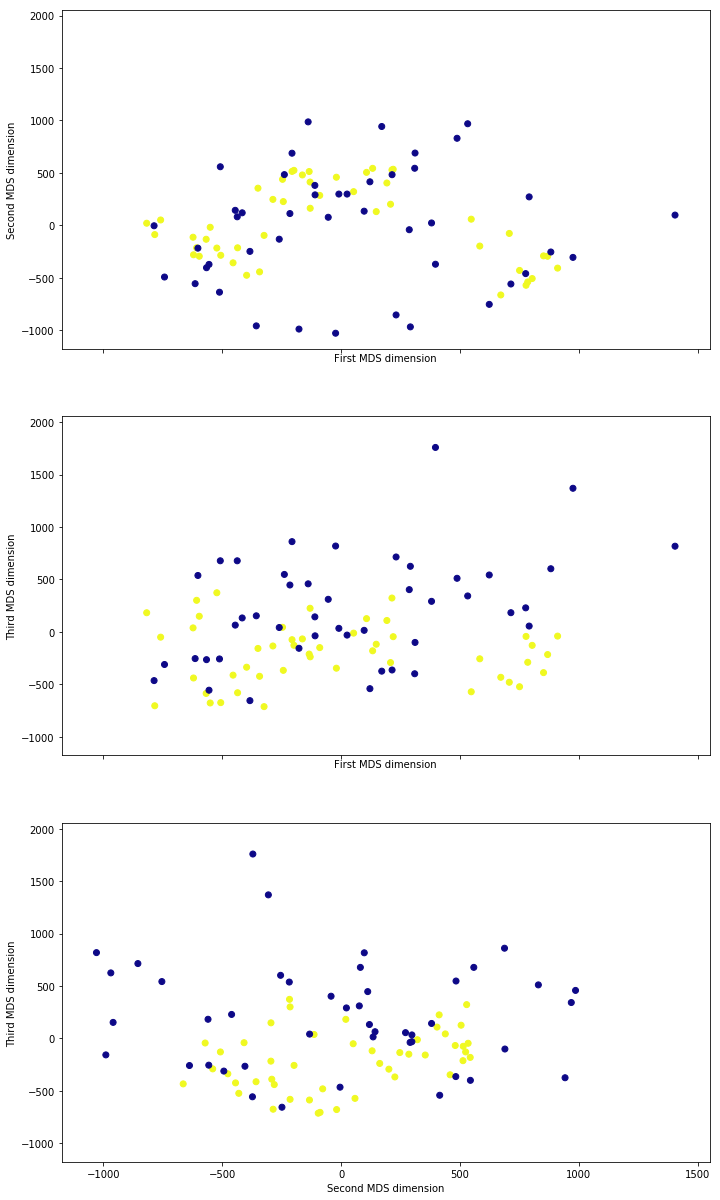

In [349]:
ThreeComponentPlot(bag_feat,bag_targ,"MDS")

Explained variance ratio:  [0.26662286 0.19065605 0.13255029]


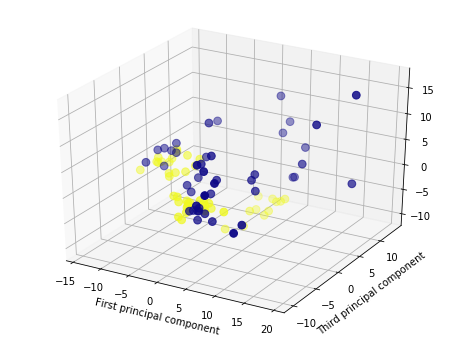

In [350]:
ThreeComponentPlot(bag_feat,bag_targ,"PCA","3D")

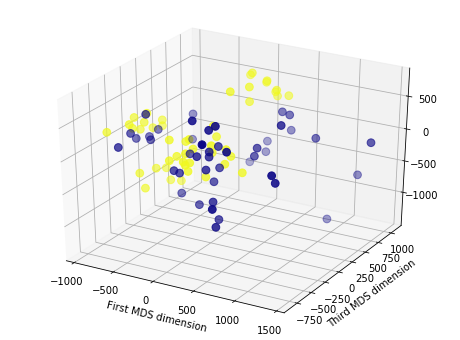

In [351]:
ThreeComponentPlot(bag_feat,bag_targ,"MDS","3D")

In [358]:
bag_max = df.groupby(["Bag ID"]).max()
bag_feat = bag_max.iloc[:, 1:]
bag_targ = bag_max.iloc[:, 0]

Explained variance ratio:  [0.29092674 0.1725567  0.11335588]


C:\Users\burak.onar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\burak.onar\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


<Figure size 576x432 with 0 Axes>

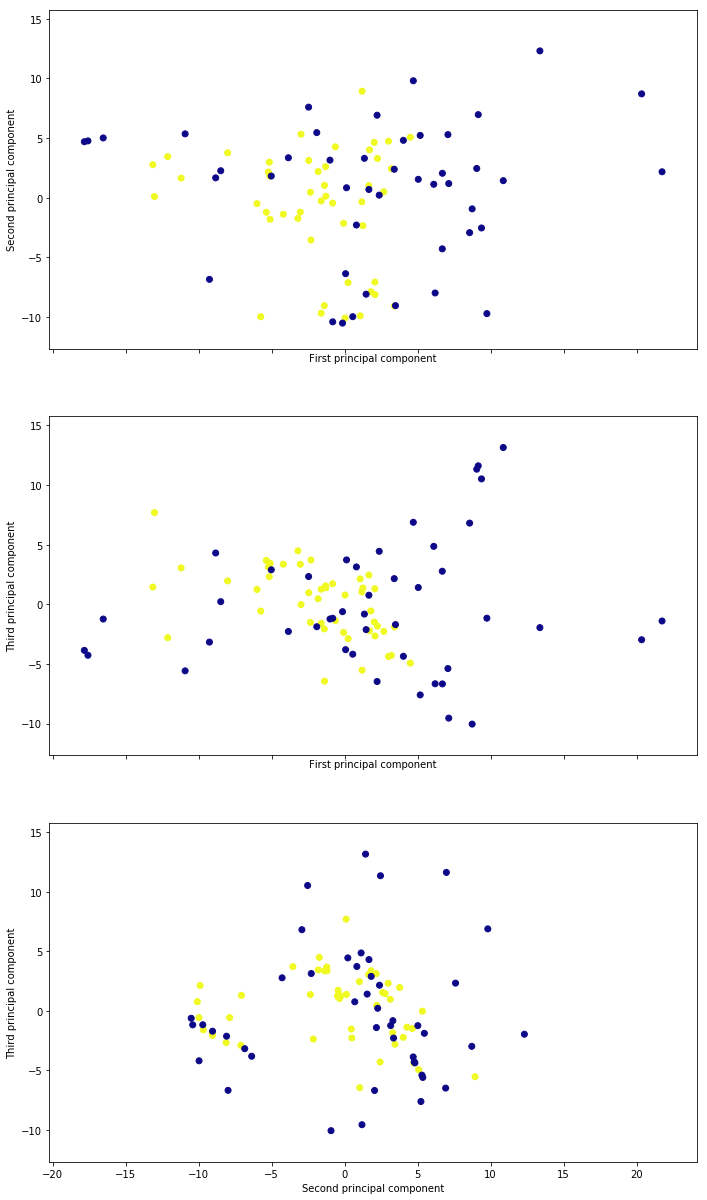

In [359]:
ThreeComponentPlot(bag_feat,bag_targ,"PCA")

C:\Users\burak.onar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\burak.onar\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


<Figure size 576x432 with 0 Axes>

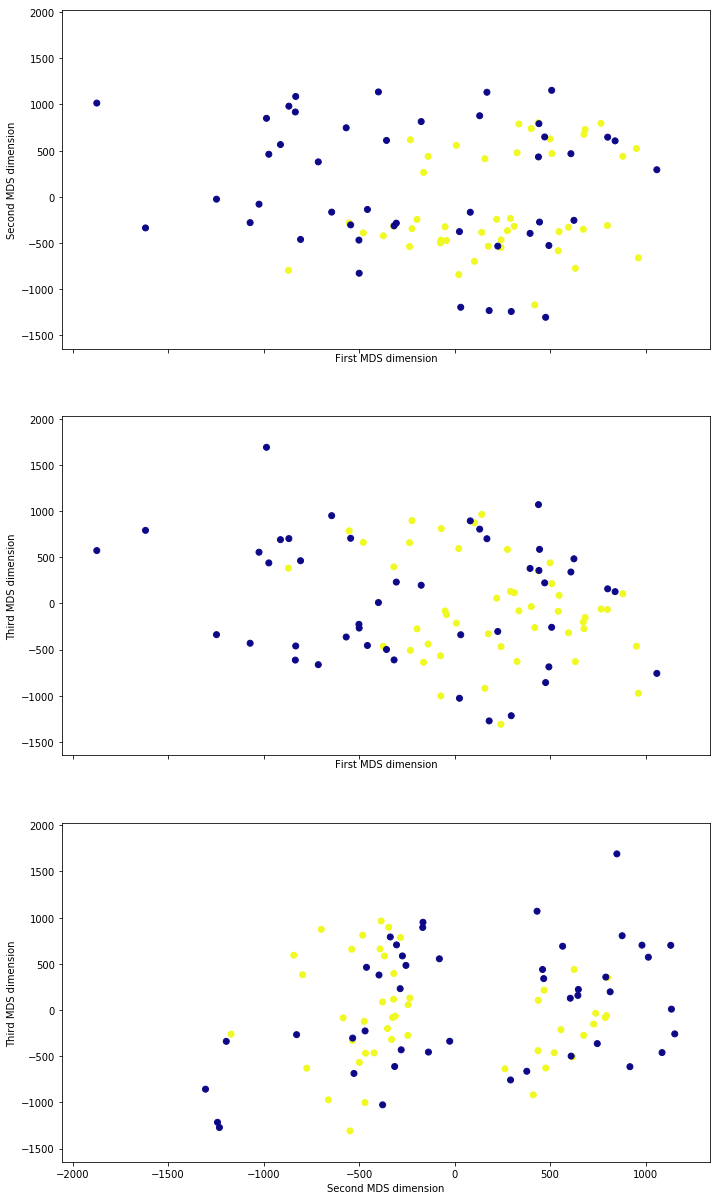

In [360]:
ThreeComponentPlot(bag_feat,bag_targ,"MDS")